In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd

# 读取 Excel 文件
processed_data = pd.read_excel('删除日期与进一步处理数据后.xlsx')

# 删除所有列中的 @ 字符
processed_data = processed_data.replace('@', '', regex=True)

# 显示特定列
column_name = "内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置"
selected_column = processed_data[column_name]

# 找出列名称含有特定字符串的列
columns_with_keyword = [col for col in processed_data.columns if '时钟' in col]

# 输出选定列的数据
print(processed_data.shape)
print(selected_column)


(675, 152)
0        NaN
1      09:04
2      02:52
3      10:08
4      06:40
       ...  
670     6:24
671     2:59
672     7:52
673     3:11
674    12:01
Name: 内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置, Length: 675, dtype: object


In [4]:
# 输出找到的列
for col in columns_with_keyword:
    print(col)

内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置
内检测信号上识别的下游制管焊缝与环焊缝交点的时钟位置


### 时钟转换角度

这段代码实现了一个函数 `convert_clock_to_angle`，该函数将输入的时钟格式表示（例如"12:30"）转换为角度表示。然后，该函数应用于指定的列，并将转换后的结果添加到DataFrame中。

具体解释如下：

1. `def convert_clock_to_angle(clock_str):`：定义一个名为 `convert_clock_to_angle` 的函数，接受一个表示时钟的字符串作为输入。

2. `if pd.isna(clock_str):`：检查输入的时钟字符串是否为 NaN（缺失值）。

3. `clock_str = clock_str.split(';')[0]`：将输入的时钟字符串按分号分割，然后选择分割后的第一个部分，以处理可能存在的多个时钟值。

4. `hrs, mins = map(int, clock_str.split(':'))`：将时钟字符串按冒号分割，然后将小时和分钟部分分别转换为整数。

5. `angle = hrs * 30 + mins * 0.5`：根据时钟的小时和分钟部分计算角度，其中小时部分对应 30 度，分钟部分对应 0.5 度。

6. `return angle`：返回计算得到的角度值。

7. `clock_cols = [...`：定义了一个列表 `clock_cols`，其中包含需要应用函数的列名。

8. `for col in clock_cols:`：遍历 `clock_cols` 列表中的每个列名。

9. `df[col + " (角度)"] = df[col].apply(convert_clock_to_angle)`：将函数 `convert_clock_to_angle` 应用于指定的列 `col`，并将转换后的角度值添加到DataFrame中，列名后缀为 "(角度)"。

总的来说，这段代码实现了将时钟格式转换为角度格式，并将转换后的角度值添加到DataFrame中，以便后续分析和处理。请确保替换变量名和列名为你实际的数据和列名。

In [5]:
# Function to convert clock format to angle
def convert_clock_to_angle(clock_str):
    # Handle NaN values
    if pd.isna(clock_str):
        return clock_str
    else:
        clock_str = clock_str.split(';')[0]  # Take the first part before the ";"
        hrs, mins = map(int, clock_str.split(':'))  # Split the time into hours and minutes
        angle = hrs * 30 + mins * 0.5  # Convert to angle
        return angle

# Apply the function and overwrite the original columns
clock_cols = ["内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置",
              "内检测信号上识别的下游制管焊缝与环焊缝交点的时钟位置"]
for col in clock_cols:
    processed_data[col] = processed_data[col].apply(convert_clock_to_angle)

# 保存修改后的数据到新的 Excel 文件
processed_data.to_excel('角度转换后.xlsx', index=False)
print(processed_data.shape)

(675, 152)


In [6]:
# 输出指定的两列
clock_cols = ["内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置",
              "内检测信号上识别的下游制管焊缝与环焊缝交点的时钟位置"]
selected_columns = processed_data[clock_cols]

# 打印选定列的数据
print(selected_columns)

     内检测信号上识别的上游制管焊缝与环焊缝交点的时钟位置  内检测信号上识别的下游制管焊缝与环焊缝交点的时钟位置
0                           NaN                       262.0
1                         272.0                       184.0
2                          86.0                       235.0
3                         304.0                        30.0
4                         200.0                       341.0
..                          ...                         ...
670                       192.0                        89.5
671                        89.5                       271.0
672                       236.0                       107.0
673                        95.5                       370.5
674                       360.5                       282.0

[675 rows x 2 columns]


# 选择列数据类型
1、先输出每列数据类型/type1 

2、寻找输出项并提取/

3、更改确认每列的数据类型是否合适/type2

4、对比type1和type2差异并输出/

In [7]:

# type1保存每列修改前的数据类型
type1 = {col: str(dtype) for col, dtype in processed_data.dtypes.items()}


In [8]:
# 将 "不合格" 改为 0，"合格" 改为 1
processed_data["复拍总结果"] = processed_data["复拍总结果"].apply(lambda x: 0 if x == "不合格" else 1)

# 输出修改后的 "复拍总结果" 列
print(processed_data["复拍总结果"])

0      1
1      0
2      1
3      0
4      1
      ..
670    0
671    1
672    1
673    1
674    1
Name: 复拍总结果, Length: 675, dtype: int64


In [9]:
# 从原数据中删除“施工记录下游管节管径”，“射线检测_一次透照长度MM“，“内检测环焊缝编号”，“内检测弯头弯管角度”，”内检测下游管节管径“，列
# 要删除的列名称列表
columns_to_remove = ["施工记录下游管节管径",
                     "射线检测_一次透照长度MM",
                     "内检测环焊缝编号",
                     "内检测弯头弯管角度",
                     "内检测下游管节管径",
                     "未回填密实的管道悬空长度/米"]

# 从原数据中删除指定列
processed_data.drop(columns=columns_to_remove, inplace=True)
print(processed_data.shape)


(675, 146)


In [10]:
# 在原数据中更改“射线检测_像质指数”，“施工期评定等级”，“射线检测_排查期复评等级”，“变壁厚“”返修“”弯头“”FT“”T“”无“”多“”焊口特征数量”
# 将他们的数据类型从 float64改为 object


# 读取 Excel 文件
# processed_data = pd.read_excel('删除日期与进一步处理数据后.xlsx')

# 要更改数据类型的列名称列表
columns_to_convert = ["射线检测_像质指数",
                     "施工期评定等级",
                     "射线检测_排查期复评等级",
                     "变壁厚",
                     "返修",
                     "弯头",
                     "FT",
                     "T",
                     "无",
                     "多",
                     "焊口特征数量",]

# 将指定列的数据类型从 float64 改为 object
processed_data[columns_to_convert] = processed_data[columns_to_convert].astype('object')

# type2保存每列修改后的数据类型
type2 = {col: str(dtype) for col, dtype in processed_data.dtypes.items()}

# 对比type1和type2，输出不同的内容
# for col in type1.keys():
#    if type2[col] != type1[col]:
#        print(f"Column '{col}': 从 {type1[col]} 变为 {type2[col]}")
print(processed_data.shape)

(675, 146)


## 独立热编码前最后确认

### 确认object类型的列数据

In [11]:
object_columns_data = processed_data.select_dtypes(include=['object'])
object_columns_data.to_excel('object类型的数据确认表.xlsx',index=False)

### 热独立编码
1、将processed_data中所有的object数据类型的列进行热独编码并删除原有的列/

2、将y_data进行热独立编码并覆盖原有列


In [12]:
# 获取 object 类型的列
object_columns = processed_data.select_dtypes(include=['object']).columns

print(object_columns.shape)
# 进行热独编码
encoded_data = pd.get_dummies(processed_data, columns=object_columns)

# 输出编码后的数据
print(encoded_data.head())

# 保存编码后的数据到新的 Excel 文件
encoded_data.to_excel('热独编码后的数据.xlsx', index=False)
print(encoded_data.shape)

(107,)
   施工记录弯头弯管角度  施工记录下游管节长度  施工记录下游管节壁厚  底片上识别的焊缝交点的间距MM  检测单位记录的壁厚1(MM)  \
0         NaN      10.300        14.6              NaN            14.6   
1         NaN      12.140        17.5              NaN            14.6   
2        29.0      12.075        17.5              NaN            14.6   
3         NaN       3.000        14.6              NaN            14.6   
4        23.0       4.300        17.5              NaN            14.6   

   检测单位记录的壁厚2(MM)       内检测里程  内检测下游管节长度  内检测下游管节壁厚  相对上游参考点距离(M)  ...  无_2.0  \
0            14.6   74120.832      5.684       17.5           NaN  ...      0   
1            14.6  149855.276     12.179       17.5           NaN  ...      0   
2            17.5   29859.214     12.154       17.5        47.806  ...      0   
3            14.6   37683.523      3.641       17.5           NaN  ...      0   
4            14.6   69656.244      4.327       17.5           NaN  ...      0   

   多_0.0  多_1.0  多_2.0  多_4.0  焊口特征数量_0.0  焊口特征数量_1.0  焊口特征数量

In [5]:
import pandas as pd
encoded_data = pd.read_excel('../0823_model/drop_encoded_data.xlsx')

## 处理nan值

错误提示显示你的输入数据 `X_iris` 中含有 NaN 值，而 `DecisionTreeClassifier` 并不直接支持处理 NaN 值。你需要在输入数据中处理 NaN 值，可以考虑以下几种方法：

1. **删除包含 NaN 的行**: 可以使用 `dropna()` 函数删除包含 NaN 值的行。
2. **填充 NaN 值**: 使用 `fillna()` 函数将 NaN 值填充为特定的值，例如均值、中位数或零。
3. **使用 Imputer 进行预处理**: 使用 `sklearn.impute.SimpleImputer` 类来对 NaN 值进行填充，然后再传入分类器。
4. **尝试其他模型**: 如果你的数据中存在 NaN 值，你也可以尝试使用能够处理 NaN 值的其他模型，如 `HistGradientBoostingClassifier` 或 `HistGradientBoostingRegressor`。

### 填充 NaN 值: 使用 fillna() 函数将 NaN 值填充为特定的值零。

# 训练和可视化决策树

In [21]:
from sklearn.tree import DecisionTreeClassifier

iris = encoded_data

y_iris = encoded_data["复拍总结果"]

# 将 encoded_data 的除去 "复拍总结果" 列的其余列载入其中
X_iris = encoded_data.drop(columns=["复拍总结果"])

# 先将 NaN 值填充为零
X_iris_filled = X_iris.fillna(0)

# 创建 DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=43)

# 拟合模型
tree_clf.fit(X_iris_filled, y_iris)

DecisionTreeClassifier(max_depth=3, random_state=43)

这段代码是一个示例，用于使用决策树分类器对鸢尾花数据集进行分类。

1. 导入必要的库：
   - `from sklearn.datasets import load_iris`：导入了 Scikit-learn 库中的 `load_iris` 函数，用于加载鸢尾花数据集。
   - `from sklearn.tree import DecisionTreeClassifier`：导入了 Scikit-learn 库中的决策树分类器类 `DecisionTreeClassifier`。

2. 加载数据集：
   - `iris = load_iris(as_frame=True)`：使用 `load_iris` 函数加载数据集，并通过参数 `as_frame=True` 返回一个 Pandas DataFrame 格式的数据集。
   
3. 准备特征和标签数据：
   - `X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values`：从数据集的 DataFrame 中选择了两个特征列 "petal length (cm)" 和 "petal width (cm)"，然后通过 `.values` 将其转换为 NumPy 数组，作为特征矩阵 `X_iris`。
   - `y_iris = iris.target`：将数据集中的目标标签作为标签向量 `y_iris`。

4. 创建和拟合决策树分类器：
   - `tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)`：创建了一个决策树分类器对象 `tree_clf`，限定树的最大深度为 2，并设置了随机种子为 42。
   - `tree_clf.fit(X_iris, y_iris)`：使用特征矩阵 `X_iris` 和标签向量 `y_iris` 对决策树分类器进行训练，即拟合模型。

总结：该代码片段演示了如何加载数据集，选择特定特征用于分类任务，然后使用决策树分类器对数据进行分类训练。通过限制树的深度，可以控制模型的复杂度，以避免过拟合。

## 类别不平衡处理:使用加权梯度提升决策树算法以平衡不同类别样本。
[4] Weighted Gradient Boosting Decision Trees (AAAI 2019)

要在已有的代码基础上使用加权梯度提升决策树算法来处理类别不平衡问题，你可以采用`class_weight`参数来调整样本权重，以便更关注少数类别。以下是如何在你的代码中添加这些步骤：

```python
from sklearn.ensemble import GradientBoostingClassifier

# 创建GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=50)

# 计算样本权重，将不同类别的样本赋予不同的权重
class_weights = {0: 1, 1: 10}  # 这里的权重需要根据实际情况进行调整

# 拟合模型，并传入样本权重
gb_clf.fit(X_iris_filled, y_iris, sample_weight=[class_weights[y] for y in y_iris])

```

在这个代码中，我用`GradientBoostingClassifier`替代了`DecisionTreeClassifier`，并设置了`class_weight="balanced"`。这会根据类别的频率自动为每个类别分配权重，以平衡不同类别之间的影响。

请注意，`GradientBoostingClassifier`在解决类别不平衡问题时通常表现得更好，因为它可以逐步调整模型以更好地拟合少数类别。但是，它也可能需要更多的调参来达到最佳性能。你可能需要尝试不同的超参数组合，如`n_estimators`、`max_depth`等，以获得最佳的模型性能。

另外，你还可以考虑其他处理类别不平衡问题的方法，比如欠采样、过采样、SMOTE等，以及不同的性能指标，如精确度、召回率、F1分数等，来评估模型的性能。

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# 创建GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=50)

# 计算样本权重，将不同类别的样本赋予不同的权重
class_weights = {0: 1, 1: 10}  # 这里的权重需要根据实际情况进行调整

# 拟合模型，并传入样本权重
gb_clf.fit(X_iris_filled, y_iris, sample_weight=[class_weights[y] for y in y_iris])


GradientBoostingClassifier(max_depth=10, random_state=50)

In [23]:
from sklearn.tree import plot_tree
import os
# 获取第一棵回归树
tree = gb_clf.estimators_[0][0]

# 可视化第一棵回归树
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_iris_filled.columns)
plt.show()


NameError: name 'plt' is not defined

In [24]:
from sklearn.tree import export_graphviz
import os

# 设置图像输出路径，将该路径替换为你实际希望保存图像的路径
IMAGES_PATH = "images"

# 导出决策树可视化
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "decision_tree.dot"),
    feature_names=X_iris.columns,  # 使用除去目标列之外的特征列名
    class_names=["合格", "不合格"],  # 根据你的实际情况调整类别名称
    rounded=True,
    filled=True
)


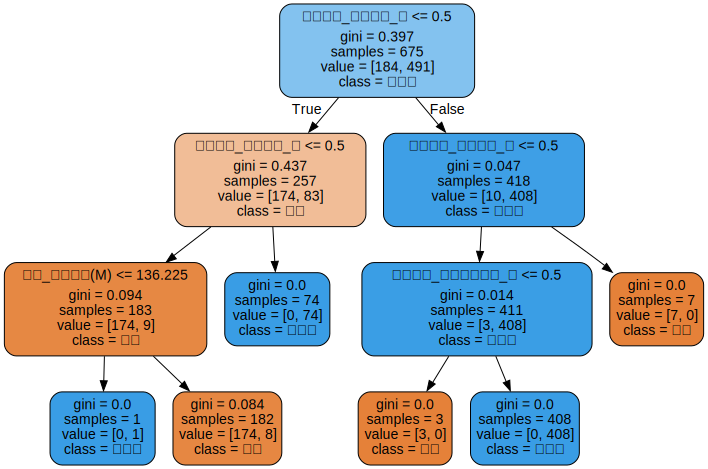

In [25]:
import graphviz
from IPython.display import display, SVG
# 读取decision_tree.dot文件并输出为SVG图像
graph = graphviz.Source.from_file("images/decision_tree.dot", format="svg")
graph.render("images/decision_tree", format="svg", cleanup=True)
# 读取并显示SVG图像
svg_path = "images/decision_tree.svg"
display(SVG(filename=svg_path))